<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Module 6: Regression

$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$


First, I am going to import the necessary package below. 

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa

%matplotlib inline

Let's get the raw data using panda function.

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

Let's look at our data.

In [ ]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


Looking at our data table, we can see that SAT is related to VerbalSAT and MathSAT, 
$$
i.e. SAT = VerbalSAT + MathSAT
$$

Now, lets use SAT and MathSAT to plot a graph.

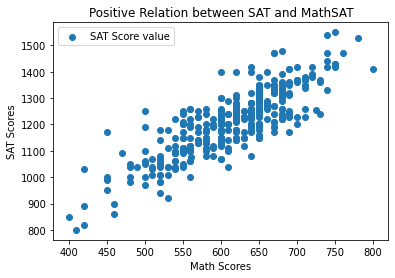

In [ ]:
plt.scatter(data["MathSAT"], data["SAT"], label="SAT Score value")
plt.title("Positive Relation between SAT and MathSAT")
plt.xlabel("Math Scores")
plt.ylabel("SAT Scores")
plt.legend()

In [ ]:
stats.pearsonr(data["MathSAT"],data["SAT"])

(0.8365916602784123, 4.093448362147636e-96)

Looking at what we've just graphed, we see that the relationship shown here is a positive one.

##Linear Regression

The linear regression is used to estimate the relationship between two quantitative variables and uses a straight line. 

Now, I am going to define some functions:

In [ ]:
def sum(data_list):
  sum = 0
  for i in data_list:
    sum += i
  return sum

def sum_of_square(data_list1, data_list2):
  sum = 0
  for i in range(len(data_list1)):
    sum = sum + data_list1[i]*data_list2[i]
  return sum

1.   The len() function is returning the total number of objects that is inside of our data. 

2.   We're using sum, a function that has been defined above to obtain our x̅ and ȳ. 
1.   Sum_of_square is used to find xx and xy. Going through the first given list, and for every i in that, using the second list to actually obtain the sum inside of the for loop.

In [ ]:
n = len(data['MathSAT'])
xbar = sum(data['MathSAT'])/n
ybar = sum(data['SAT'])/n
xy = sum_of_square(data['MathSAT'],data['SAT'])
xx = sum_of_square(data['MathSAT'],data['MathSAT'])

slope = (xy-n*xbar*ybar)/(xx-n*xbar**2)
intercept = ybar - slope*xbar

In [ ]:
print("xy = ",xy)

print ("xx = ",xx)

print("x̅ = ",xbar)

print("ȳ = ", ybar)

print ("n = ",n)

xy =  268048133
xx =  136144846
x̅ =  609.4364640883978
ȳ =  1203.6270718232045
n =  362


Above is the output of the five variables that we've set above. 



In [ ]:
def formula(variable,slope, intercept):
  return variable*slope+intercept

In [ ]:
print(f"slope = {slope}")
print(f"intercept = {intercept}")

slope = 1.4814731127631662
intercept = 300.76333633878824


Python has a builtin package to do linear regression. Let's check my work using the builtin package.

In [ ]:
regression = stats.linregress(data["MathSAT"],data["SAT"])
regression

LinregressResult(slope=1.4814731127631733, intercept=300.7633363387839, rvalue=0.8365916602784129, pvalue=4.093448362145017e-96, stderr=0.05112960119117141)

Let's pull slope and and intercept from above.

In [ ]:
m = regression[0]
b = regression[1]

def y(x):
  return formula(x,m,b)

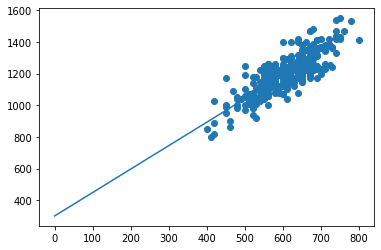

In [ ]:
x = np.arange( 0,500,1)
plt.scatter(data["MathSAT"],data["SAT"])
plt.plot(x,y(x))

##Nonlinear Regression

The Nonlinear regression is a type of regression in which data is fit to a model and then expressed as a mathematical function and it uses a curved line. 

More than a straight line can be used graphing a nonlinear equation, depending on the mathematical function expressed, compared to the linear regression above. 

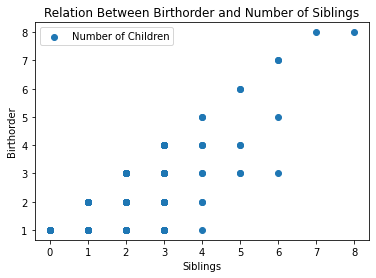

In [ ]:
plt.scatter(data["Siblings"],data["BirthOrder"], label="Number of Children")
plt.xlabel("Siblings")
plt.ylabel("Birthorder")
plt.title("Relation Between Birthorder and Number of Siblings")
plt.legend()


Looks like a quadratic equation

Setting our variables of x, xx, xxx and xxxx using the functions that we defined earlier in our project. This is to create our variable matrix.

In [ ]:
x = sum(data['Siblings'])
xx = sum_of_square(data['Siblings'],data['Siblings'])
xxx = sum_of_square(data['Siblings']**2,data['Siblings'])
xxxx = sum_of_square(data['Siblings']**3,data['Siblings'])

matrix = [[n,x,xx,sum(data['BirthOrder'])]
          ,[x,xx,xxx,sum_of_square(data['Siblings'],data['BirthOrder'])]
          ,[xx,xxx,xxxx,sum_of_square(data['Siblings']**2,data['BirthOrder'])]
          ]

Here, I am going to import the Gauss Jordan function from project 4. 

In [ ]:
# import math
# import numpy as np

# def swap(matrix, row1, row2):
#   swapped_matrix = []
#   size = len(matrix)      #to find the size of a matrix
#   for i in range(size):   #using loop to go through each row
#     if i == row1:
#       swapped_matrix.append(matrix[row2,:])   
#     elif i == row2:
#       swapped_matrix.append(matrix[row1,:])
#     else:
#       swapped_matrix.append(matrix[i,:])
#   return np.array(swapped_matrix)



# def add_rows(matrix, target_row, adding_row, multiplier):
#     added_matrix = []
#     size = len(matrix)
#     for i in range(size):   #using loop to go through each row
#       if i == target_row:
#         old_row = matrix[target_row,:]
#         adding_values = multiplier * matrix[adding_row,:]
#         new_row = old_row + adding_values
#         added_matrix.append(new_row)
#       else:
#         added_matrix.append(matrix[i,:])
#     return np.array(added_matrix)



# def multiply(matrix, target_row, constant):
#     new_matrix = []
#     size = len(matrix)
#     for i in range(size):   #using loop to go through each row
#       if i == target_row:
#         new_matrix.append(constant * matrix[target_row,:])
#       else:
#         new_matrix.append(matrix[i,:])
#     return np.array(new_matrix)



# def max_value_row(matrix, column):
#   col = matrix[column:,column]
#   max = 0
#   for i in range(len(col)):
#     if col[max] < col[i]:
#       max = i
#   max_row = max + column
#   return max_row



# def gaussJordan(matrix):
#     for i in range(len(matrix)):  #using loop to go through each row
#       pos = max_value_row(matrix, i)  #using max_value_row function to find the row with largest leftmost value   
#       matrix = swap(matrix, pos, i)   #swapping current row with row found on previous step   
#       constant = 1/matrix[i,i]        
#       matrix = multiply(matrix,i,constant)  #using multiply function to make the diagonal 1
#       for column in range(0,i):             
#         matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
#       for column in range(i+1,len(matrix)):
#         matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
#     return np.array(matrix)

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

In [ ]:
gaussJordan(np.array(matrix))

array([[ 1.,  0.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  0.,  1., nan]])